# Evolutionary Computation Assignment 9 – Hybrid evolutionary algorithm

- Vadym Repetskyi 155610
- Krzysztof Szala 144571

## Pseudocode

```python
def hybrid_evolutionary():
    population = init_with_ls(POPULATION_SIZE)
    fitness = calculate_fitness(population)

    population = sort_by(population, fitness)
    fitness = sort(fitness)

    while execution_time < EXECUTION_MINUTES:
        parents = select_distinct_parents(population)

        # Depending the on experiment use one of the recombination operators and optionally perform local search
        offspring = recombine(parents)
        offspring = perform_ls(offspring)

        offspring_fitness = calculate_fitness(offspring)
        worse_index = None
        for i, f for enumerate(fitness):
            if f == offspring_fitness:
                # Ensure there is no duplication
                break
            if f > offspring_fintess:
                worse_index = i
                break

        if worse_index is None:
            # Insert the offspring only if it is an improvement
            continue

        population.insert(worse_index, offspring)
        fitness.insert(worse_index, offspring_fitness)

        population.pop()
        fitness.pop()

    return population[0]
```

Random recombination:
- Find common nodes and edges
- Take one parent and keep only common edges
- Insert remaining common nodes at random positions, ensuring that no common edges are broken in the process
- Insert random nodes in an identical way until the solution length is satisfactory


Heuristic recombination (as in LNS):
- Find common nodes and edges
- Take one parent and keep only common edges
- Insert remaining common nodes at random positions, ensuring that no common edges are broken in the process
- Use NN-At-Any heuristic to reconstruct the remaining parts of the solution, while preserving common edges

In [1]:
import time
import random
from utils import TspInstance, random_solution, local_search
import numpy as np

tsp_a = TspInstance("TSPA.csv")
tsp_b = TspInstance("TSPB.csv")

In [34]:
def recombine_random(parent1, parent2):
    n = len(parent1)

    edges_parent1 = {frozenset((parent1[i], parent1[(i + 1) % n])) for i in range(n)}
    edges_parent2 = {frozenset((parent2[i], parent2[(i + 1) % n])) for i in range(n)}
    common_edges = edges_parent1 & edges_parent2
    common_nodes = set(parent1) & set(parent2)

    common_edges_nodes = set()
    for edge in common_edges:
        common_edges_nodes.update(edge)

    # Keep only nodes from common_edges
    offspring = [n for n in parent1 if n in common_edges_nodes]

    nodes_to_insert = common_nodes - common_edges_nodes
    while len(offspring) < n:
        # Insert common nodes, then random nodes at random places without breaking common_edges

        index = random.randint(0, len(offspring))

        if (
            len(offspring) == 0
            or frozenset(
                (
                    offspring[(index - 1) % len(offspring)],
                    offspring[index % len(offspring)],
                )
            )
            not in common_edges
        ):
            if len(nodes_to_insert) > 0:
                insert = random.choice(list(nodes_to_insert))
                nodes_to_insert.remove(insert)
            else:
                insert = random.choice(list(set(range(200)) - set(offspring)))
            offspring.insert(index, insert)

    return np.array(offspring)

In [58]:
POPULATION_SIZE = 20
EXECUTION_MINUTES = 4 * 60

tsp = tsp_a


def hybrid_evolutionary():
    start_time = time.time()

    population = np.array(
        [
            local_search(tsp, 0, random_solution, "edge", False)
            for _ in range(POPULATION_SIZE)
        ]
    )
    fitness = np.array([tsp.get_cost(s) for s in population])

    sorted_indices = np.argsort(fitness)
    population = population[sorted_indices]
    fitness = fitness[sorted_indices]

    ind = 0
    while time.time() - start_time < EXECUTION_MINUTES:
        print(ind + 1, fitness[0])
        ind += 1

        offspring = recombine_random(
            *population[np.random.choice(len(population), size=2, replace=False)]
        )
        offspring = local_search(tsp, 0, lambda *_: offspring, "edge", False)
        offspring_fitness = tsp.get_cost(offspring)
        print(offspring_fitness)

        worse_index = None
        for i, f in enumerate(fitness):
            if f == offspring_fitness:
                # Ensure there is no duplication
                break
            if f > offspring_fitness:
                worse_index = i
                break

        if worse_index is None:
            # Insert the offspring only if it an improvement
            continue

        population = np.insert(population, worse_index, offspring, axis=0)[:-1]
        fitness = np.insert(fitness, worse_index, offspring_fitness, axis=0)[:-1]

    return population[0], population[-1]

## Graphs

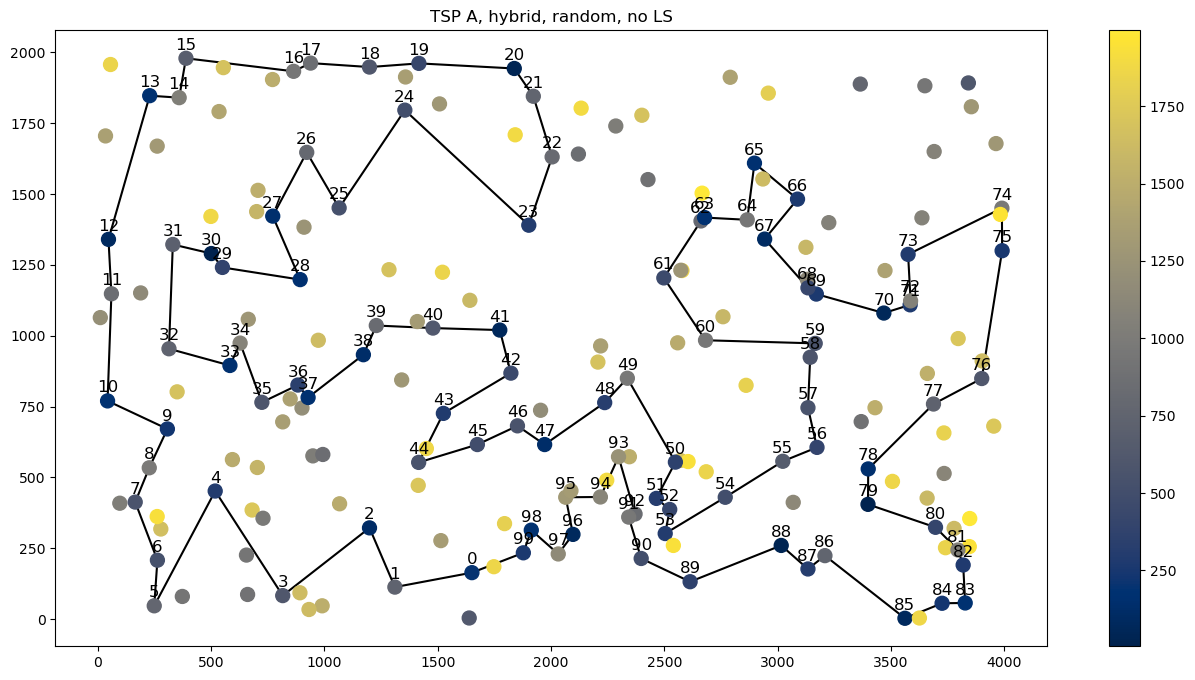

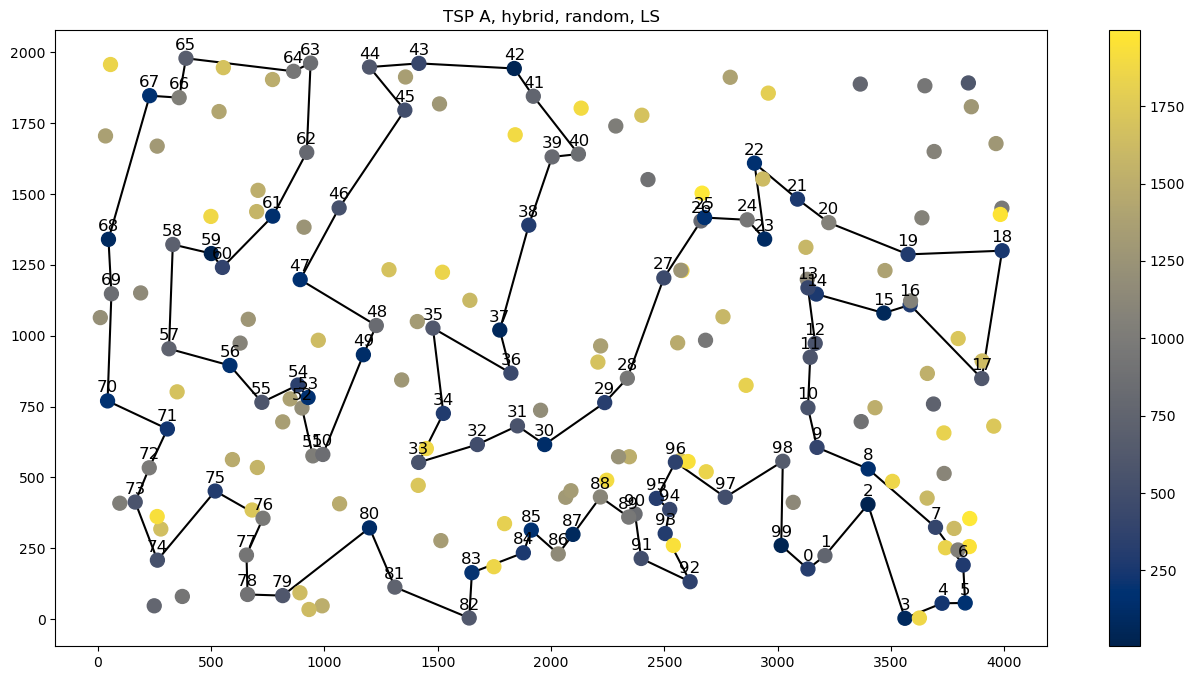

In [60]:
tsp.plot(a[0], "TSP A, hybrid, random, LS")

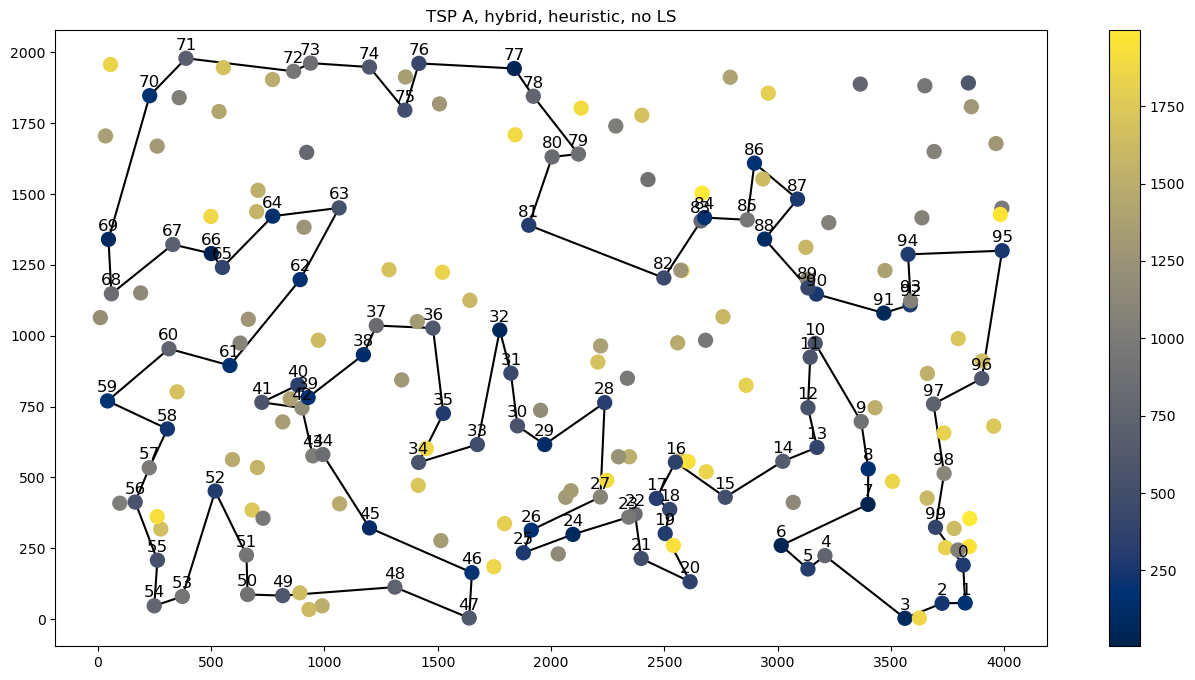

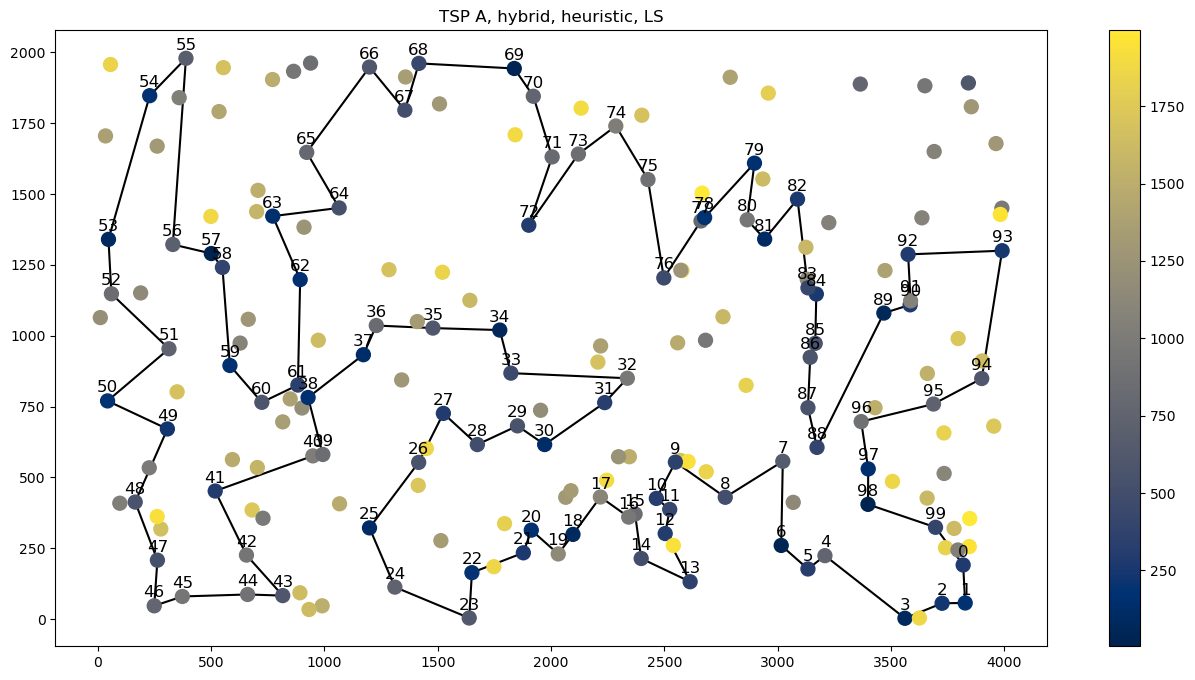

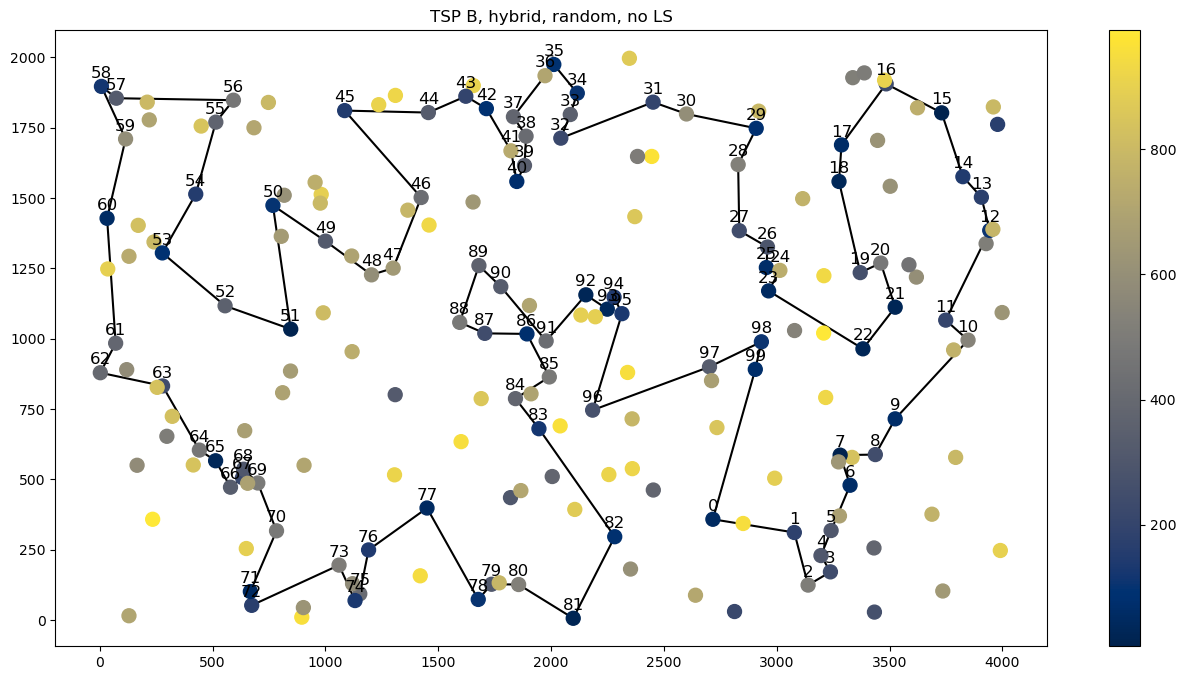

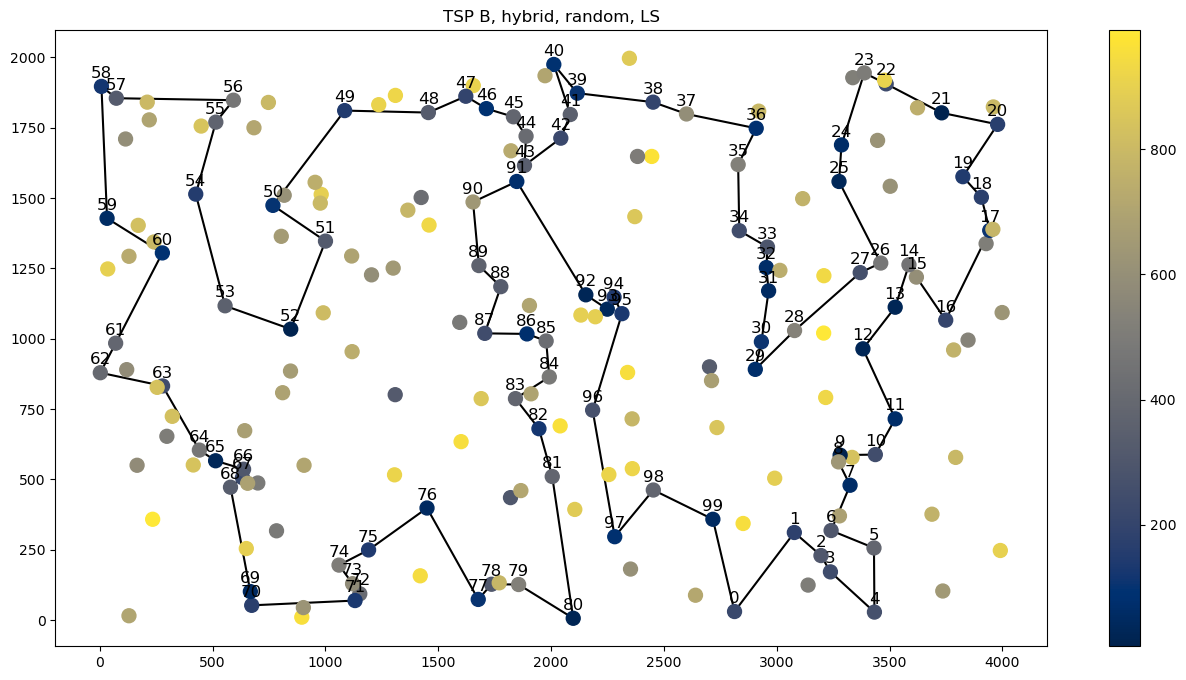

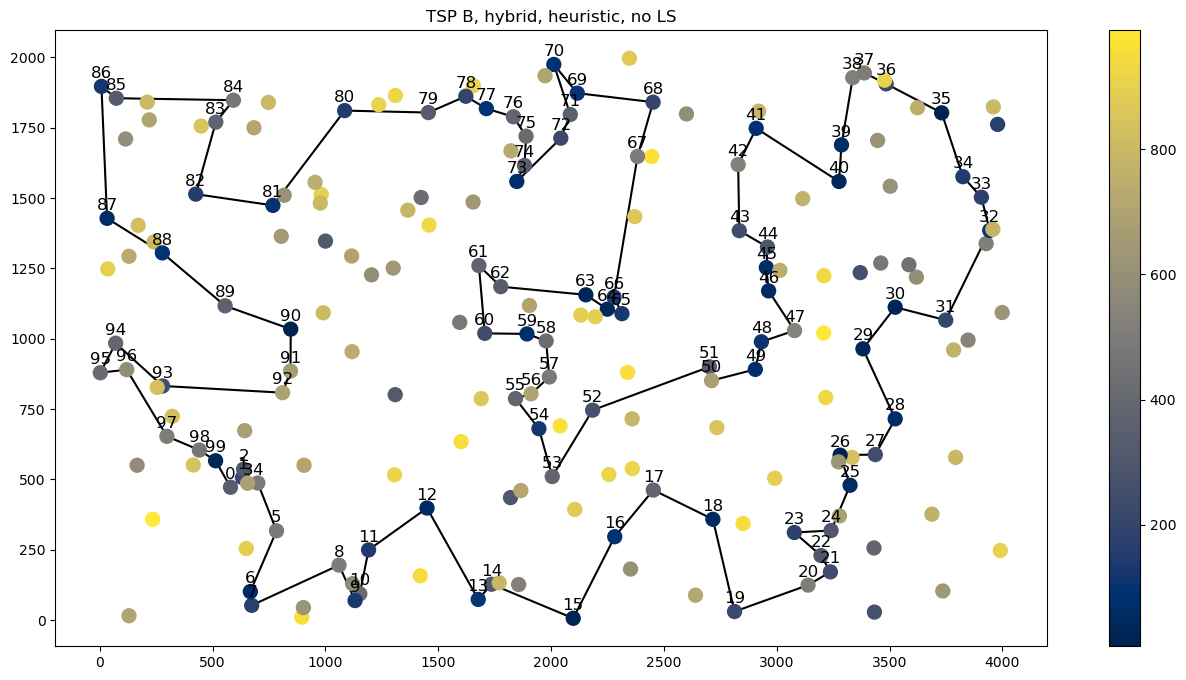

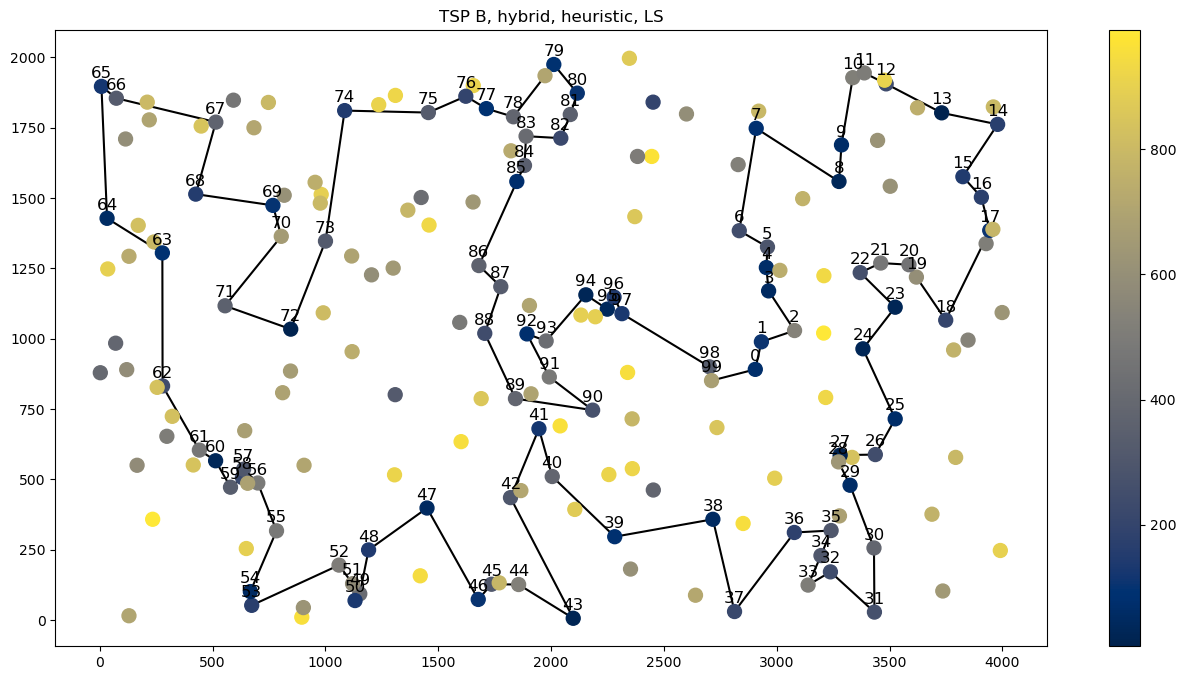

In [ ]:
a = hybrid_evolutionary()
a

## Results

<table border="1">
  <thead>
    <tr>
      <th>TSP Instance</th>
      <th>Method</th>
      <th>Min</th>
      <th>Mean</th>
      <th>Max</th>
      <th>Avg runs in specified time</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="8">A</td>
      <td>MSLS</td>
      <td>71587</td>
      <td>72481</td>
      <td>73618</td>
      <td>200</td>
    </tr>
    <tr>
      <td>ILS</td>
      <td>70881</td>
      <td>72064</td>
      <td>73487</td>
      <td>823</td>
    </tr>
    <tr>
      <td>LNS no LS</td>
      <td>69144</td>
      <td>70080</td>
      <td>71956</td>
      <td>554</td>
    </tr>
    <tr>
      <td>LNS LS</td>
      <td>69159</td>
      <td>69830</td>
      <td>71764</td>
      <td>502</td>
    </tr>
    <tr>
      <td>Hybrid, random, no LS</td>
      <td>72137</td>
      <td>73684</td>
      <td>73930</td>
      <td>189342</td>
    </tr>
    <tr>
      <td>Hybrid, random, LS</td>
      <td>70103</td>
      <td>70443</td>
      <td>71630</td>
      <td>788</td>
    </tr>
    <tr>
      <td>Hybrid, heuristic, no LS</td>
      <td>70347</td>
      <td>70542</td>
      <td>71030</td>
      <td>1981</td>
    </tr>
    <tr>
      <td>Hybrid, heuristic, LS</td>
      <td>69989</td>
      <td>70291</td>
      <td>70783</td>
      <td>943</td>
    </tr>
</tbody>
</table>
<table border="1">
  <thead>
    <tr>
      <th>TSP Instance</th>
      <th>Method</th>
      <th>Min</th>
      <th>Mean</th>
      <th>Max</th>
      <th>Avg runs in specified time</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="8">B</td>
      <td>MSLS</td>
      <td>45664</td>
      <td>46822</td>
      <td>47707</td>
      <td>200</td>
    </tr>
    <tr>
      <td>ILS</td>
      <td>45119</td>
      <td>46239</td>
      <td>47922</td>
      <td>813</td>
    </tr>
    <tr>
      <td>LNS no LS</td>
      <td>43516</td>
      <td>46418</td>
      <td>44497</td>
      <td>608</td>
    </tr>
    <tr>
      <td>LNS LS</td>
      <td>43459</td>
      <td>45479</td>
      <td>48401</td>
      <td>517</td>
    </tr>
    <tr>
      <td>Hybrid, random, no LS</td>
      <td>46432</td>
      <td>47054</td>
      <td>48109</td>
      <td>143534</td>
    </tr>
    <tr>
      <td>Hybrid, random, LS</td>
      <td>44257</td>
      <td>44731</td>
      <td>45620</td>
      <td>728</td>
    </tr>
    <tr>
      <td>Hybrid, heuristic, no LS</td>
      <td>44117</td>
      <td>44648</td>
      <td>45212</td>
      <td>1298</td>
    </tr>
    <tr>
      <td>Hybrid, heuristic, LS</td>
      <td>43991</td>
      <td>44098</td>
      <td>44972</td>
      <td>783</td>
    </tr>
  </tbody>
</table>


## Conclusions

- Applying heuristic to the method allows to land closer to local optimum, allowing for more iterations in the same time
- All versions of the hybrid algorithm show quite high convergence speed
- In hybrid EA combining heuristic with LS gives the best results
- For TSP A LNS LS remains the best method
- For TSP B Hybrid, heuristic, LS is the best method